# Pyber_starter

In [1]:
 %matplotlib notebook
    
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [2]:
# File to Load (Remember to change these)
city_data_to_load = pd.read_csv("../Homework5/city_data.csv")
ride_data_to_load = pd.read_csv("../Homework5/ride_data.csv")

In [3]:
# Read the City and Ride Data
city_data_to_load.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [4]:
# Read the City and Ride Data
ride_data_to_load.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [5]:
# Combine the data into a single dataset
joincitydf = pd.merge(city_data_to_load, ride_data_to_load, on='city',how='left')


In [6]:
# Display the data table for preview
joincitydf.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


# Bubble Plot of Ride Sharing Data

In [7]:
joincitydf.groupby(["type"]).mean()

,driver_count,fare,ride_id
type,,,
Rural,4.296000,34.623440,4.647746e+12
Suburban,13.712000,30.970128,4.971015e+12
Urban,36.678154,24.525772,4.873485e+12


In [8]:
joincitydf.groupby(["type"]).count()

,city,driver_count,date,fare,ride_id
type,,,,,
Rural,125,125,125,125,125
Suburban,625,625,625,625,625
Urban,1625,1625,1625,1625,1625


In [9]:
# Obtain the x and y coordinates for each of the three city types
urbancity = joincitydf.loc[joincitydf["type"]=="Urban"]
suburban = joincitydf.loc[joincitydf["type"]=="Suburban"]
ruralcity = joincitydf.loc[joincitydf["type"]=="Rural"]

y_urban=urbancity.groupby(["city"])["fare"].mean()
y_sub=suburban.groupby(["city"])["fare"].mean()
y_rural=ruralcity.groupby(["city"])["fare"].mean()

x_urban=urbancity.groupby(["city"])["ride_id"].count()
x_sub=suburban.groupby(["city"])["ride_id"].count()
x_rural=ruralcity.groupby(["city"])["ride_id"].count()

driverurban=urbancity.groupby(["city"])["driver_count"].mean()
drivesub=suburban.groupby(["city"])["driver_count"].mean()
driverrural=ruralcity.groupby(["city"])["driver_count"].mean()


<IPython.core.display.Javascript object>


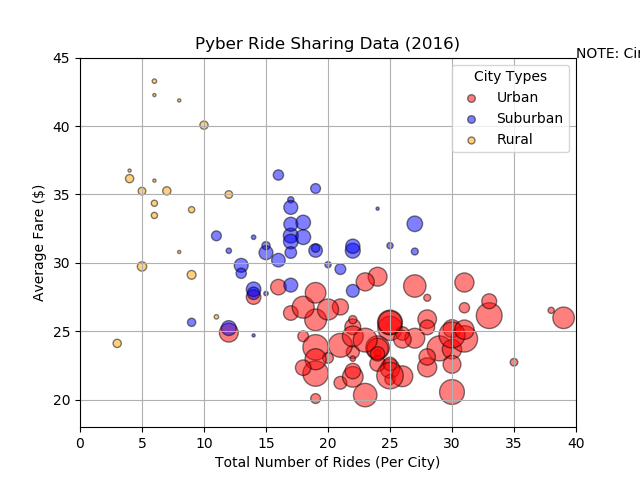

In [10]:
# Build the scatter plots for each city types
plt.scatter(x_urban, y_urban, c="red",edgecolors="black", marker="o", label="Urban", s=5*driverurban, alpha=0.5)
plt.scatter(x_sub, y_sub, c="blue",edgecolors="black", marker="o", label = "Suburban", s=5*drivesub, alpha=0.5)
plt.scatter(x_rural, y_rural,edgecolors="black", c="orange", marker="o", label="Rural", s=5*driverrural, alpha=0.5)

#Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)

# Create a legend
lgnd = plt.legend(title="City Types",loc="best")
lgnd.legendHandles[0]._sizes=[30]
lgnd.legendHandles[1]._sizes=[30]


# Incorporate a text label regarding circle size
plt.axis([0, 40, 18, 45])
t=("NOTE: Circle size correlates with driver count per city.")
plt.text(40,45,t)
# Save Figure
plt.savefig("../Homework5/bubbleplot.png")
 # Show Figure
plt.show()

# Total Fares by City Type

In [11]:
# Calculate Type Percents
citysum=joincitydf.groupby(["type"])["fare"].sum()

faretotal=joincitydf["fare"].sum()

percentfare=citysum/faretotal*100
percentfare

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

<IPython.core.display.Javascript object>


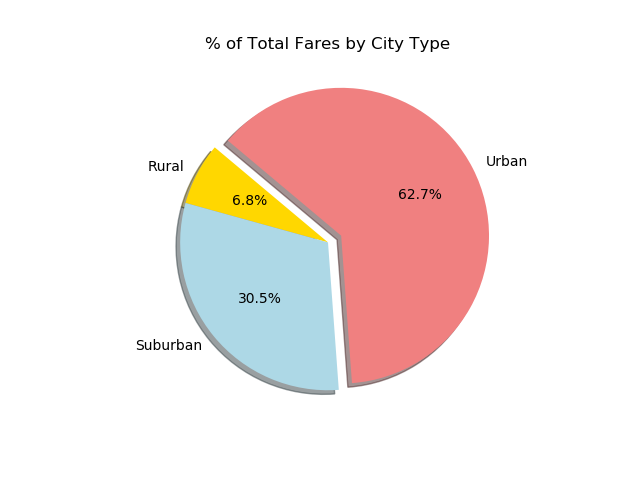

In [12]:
# Build Pie Chart
slices = percentfare
type = "Rural","Suburban","Urban"
color = ['gold','lightblue','lightcoral']

plt.pie(slices, labels=type, colors=color,explode=(0,0,0.1),shadow=True,autopct='%1.1f%%',startangle=140)
plt.title("% of Total Fares by City Type")
# Save Figure
plt.savefig("../Homework5/pieFares.png")
 # Show Figure
plt.show()

# Total Rides by City Type

In [16]:
 # Calculate Ride Percents
ridecitysum=joincitydf.groupby(["type"])["ride_id"].count()

ridetotal=joincitydf["ride_id"].count()

percentrides=ridecitysum/ridetotal*100
percentrides

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

<IPython.core.display.Javascript object>


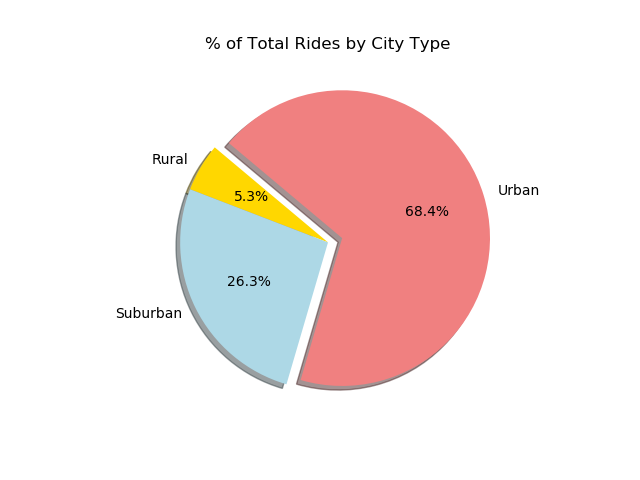

In [17]:
# Build Pie Chart
slices = percentrides
type = "Rural","Suburban","Urban"
color = ['gold','lightblue','lightcoral']

plt.pie(slices, labels=type, colors=color,explode=(0,0,0.1),shadow=True,autopct='%1.1f%%',startangle=140)
plt.title("% of Total Rides by City Type")
# Save Figure
plt.savefig("../Homework5/pieRides.png")
# Show Figure
plt.show()

# Total Drivers by City Type

In [31]:
# Calculate Driver Percents
drivercitysum=city_data_to_load.groupby(["type"])["driver_count"].sum()

drivertotal=city_data_to_load["driver_count"].sum()

percentdriver=drivercitysum/drivertotal*100
percentdriver

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

<IPython.core.display.Javascript object>


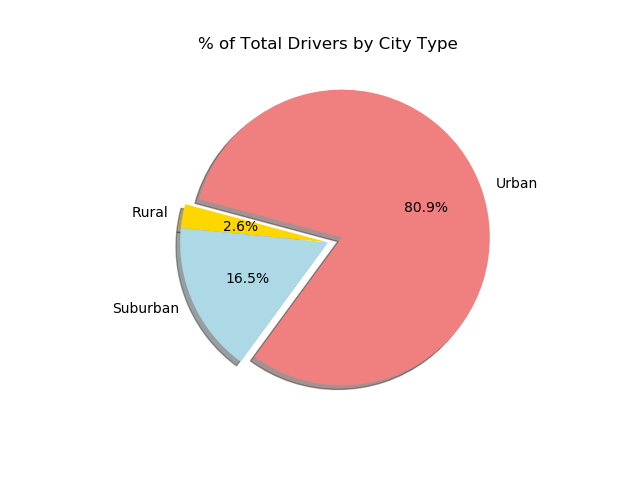

In [32]:
# Build Pie Charts
slices = percentdriver
type = "Rural","Suburban","Urban"
color = ['gold','lightblue','lightcoral']

plt.pie(slices, labels=type, colors=color,explode=(0,0,0.1),shadow=True,autopct='%1.1f%%',startangle=165)
plt.title("% of Total Drivers by City Type")
# Save Figure
plt.savefig("../Homework5/pieDrivers.png")
 # Show Figure
plt.show()